# Running an ESPy calculation
In this tutorial, we will run several calculations using the ```Elastic_stresses_py``` library:
1. We will run a calculation using the command line and configuration/inputs through text files. 
2. We will run a calculation using the Python API. 
3. We will run a calculation modifying the inputs and outputs using the Python API, which simulates how you would use ESPy in a loop or over multiple calculations at once. 

# Part 1: Command line API
The basic usage of ```Elastic_stresses_py``` is through the command line.  We could first create an empty config file in the current directory (```.```) with: 

In [39]:
!elastic_stresses_config_writer.py .

You can check out the contents of this default config file. Remember that in a general case, the values and filepaths in this config file will need to be changed for your specific application. This file can be edited in a text editor.  For now, the values are good and we can move on to running the example calculation: 

In [40]:
!elastic_stresses_driver.py my_config.txt

Now you can check out the results. You calcualted a set of displacements and stresses from a hypothetical M6.8 earthquake at 16.4 km depth offshore northern California. The input format within ```M6.8_2014.intxt``` was the **Source_WC** format, which means a rectangular dislocation with dimensions calculated from Wells and Coppersmith (1994). 

Graphics resolution (DPI) on saved png's might be better when running this code from a script or a command line, rather than from a Jupyter notebook - I'm not sure why. However, Jupyter notebooks graphics will be good enough for exploration. 

# Part 2: Python API

Now, let's do the same thing through the Python API that ```Elastic_stresses_py``` is actually using on the inside. 

We always calculate in 4 steps: 
1. Configure
2. Input
3. Compute
4. Output

If you open the ```elastic_stresses_driver.py``` [script here](https://github.com/kmaterna/Elastic_stresses_py/blob/master/PyCoulomb/bin/elastic_stresses_driver.py), you'll see them expressed in this way: 
```
params = PyCoulomb.configure_calc.configure_stress_calculation(config_file);
[inputs, obs_disp_points, obs_strain_points] = PyCoulomb.input_values.read_inputs(params);
out_object = PyCoulomb.run_dc3d.do_stress_computation(params, inputs, obs_disp_points, obs_strain_points);
PyCoulomb.output_manager.produce_outputs(params, inputs, obs_disp_points, obs_strain_points, out_object);
```

In this API example, we're just running the steps one-by-one instead of all at once.  

### Step 1: Configure
We begin by executing the "Configure" step: reading a config file into an object type called ```Params``` (definition [here](https://github.com/kmaterna/Elastic_stresses_py/blob/master/PyCoulomb/coulomb_collections.py#L7)). 

In [41]:
from Elastic_stresses_py import PyCoulomb

# Create deafult Params object from the configuration file
default_params = PyCoulomb.configure_calc.configure_stress_calculation("my_config.txt");

Config file:  my_config.txt
Params(config_file='my_config.txt', input_file='M6.8_2014.intxt', aftershocks='CA_aftershocks_2014.txt', disp_points_file='CA_GPS_ll.txt', strain_file='', strike_num_receivers=10, dip_num_receivers=10, fixed_rake='', mu=30000000000.0, lame1=30000000000.0, B=0.0, alpha=0.6666666666666666, plot_stress=1, plot_grd_disp=1, outdir='Outputs/my_experiment/')


### Step 2: Input
We then execute the input phase, reading an input file (```M6.8_2014.intxt```) into an object type called ```Input_object``` (definition [here](https://github.com/kmaterna/Elastic_stresses_py/blob/master/PyCoulomb/coulomb_collections.py#L29)). Optional objects for gps displacement points (```obs_disp_points```, definition [here](https://github.com/kmaterna/Elastic_stresses_py/blob/master/PyCoulomb/coulomb_collections.py#L55)) and/or strain calculation points (not used in this example) are also created. 

In [42]:
# Read inputs.
[default_inputs, obs_disp_points, _] = PyCoulomb.input_values.read_inputs(default_params);

Reading source and receiver fault information from file M6.8_2014.intxt 
Reading displacement points from file CA_GPS_ll.txt 
Number of sources: 1
Moment Magnitude from Rectangular Fault Patches (assuming G=30.0GPa): 6.800000


### Step 3 and Step 4: Compute, Output
Now we are ready to execute the calculation like normal. 

Beginning stress calculation.
Number of sources: 1 
Number of receivers: 1 
Splitting 1 receiver faults into 100 subfaults each.
Computing synthetic grid of dispalcements
Number of disp_points: 105
Resolving stresses on receiver fault(s).
Resolving stresses on a horizontal profile.
Writing file Outputs/my_experiment/used_config.txt 
Writing Outputs/my_experiment/ll_disps.txt 
Writing Outputs/my_experiment/receiver_traces.txt
Writing outfile Outputs/my_experiment/subfaulted.inp 
Reading aftershocks from file CA_aftershocks_2014.txt 
Writing file Outputs/my_experiment/stresses_full.txt 
Making plot of shear stress on receiver fault patches: Outputs/my_experiment/Stresses_shear.png. 
Making plot of normal stress on receiver fault patches: Outputs/my_experiment/Stresses_normal.png. 
Making plot of coulomb stress on receiver fault patches: Outputs/my_experiment/Stresses_coulomb.png. 
Reading aftershocks from file CA_aftershocks_2014.txt 
Reading aftershocks from file CA_aftershocks_2014.txt

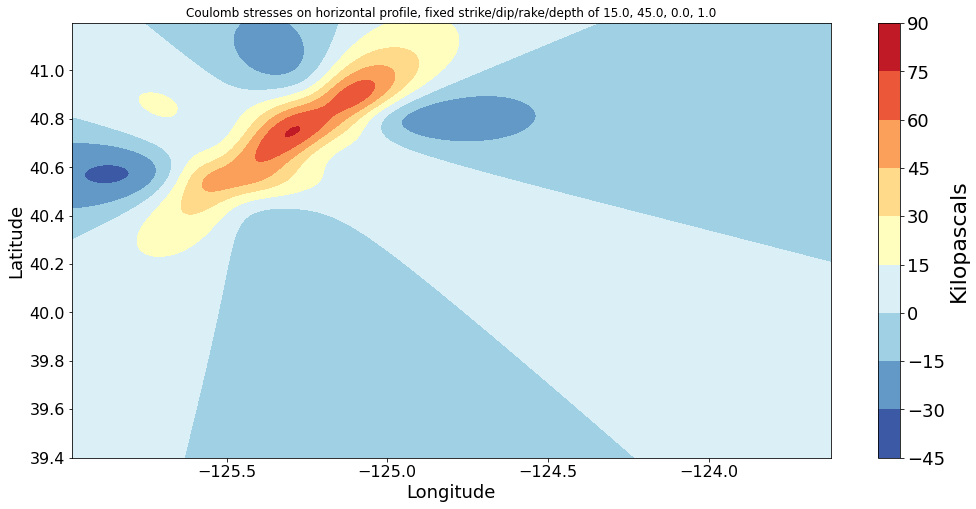

In [43]:
out_object = PyCoulomb.run_dc3d.do_stress_computation(default_params, default_inputs, obs_disp_points, ());  # compute
PyCoulomb.output_manager.produce_outputs(default_params, default_inputs, obs_disp_points, (), out_object);  # output

# Part 3: Modifying Inputs and Configuration Parameters with Python API

Now, let's say you wanted to create a different earthquake source: let's say you wanted to change the strike from 228° to 200° and the depth from 16 km to 1 km.  Let's also say you wanted to change the output directory so you don't overwrite the original experiment results. 


As a reminder, the steps of ```elastic_stresses_driver.py``` are: 
```
params = PyCoulomb.configure_calc.configure_stress_calculation(config_file);
[inputs, obs_disp_points, obs_strain_points] = PyCoulomb.input_values.read_inputs(params);
out_object = PyCoulomb.run_dc3d.do_stress_computation(params, inputs, obs_disp_points, obs_strain_points);
PyCoulomb.output_manager.produce_outputs(params, inputs, obs_disp_points, obs_strain_points, out_object);
```

In this API example, we will modify the "Configure" and "Input" steps.  "Compute" and "Output" will remain the same as usual. 

### Step 1: Configure
We first execute the "Configure" step like normal: reading a config file into an object type called ```Params```. 

In [44]:
from Elastic_stresses_py import PyCoulomb

# Create deafult Params object from the configuration file
default_params = PyCoulomb.configure_calc.configure_stress_calculation("my_config.txt");

Config file:  my_config.txt
Params(config_file='my_config.txt', input_file='M6.8_2014.intxt', aftershocks='CA_aftershocks_2014.txt', disp_points_file='CA_GPS_ll.txt', strain_file='', strike_num_receivers=10, dip_num_receivers=10, fixed_rake='', mu=30000000000.0, lame1=30000000000.0, B=0.0, alpha=0.6666666666666666, plot_stress=1, plot_grd_disp=1, outdir='Outputs/my_experiment/')


We next modify the Params object to direct our outputs into a different output folder, one that represents the modified geometry.  

In [45]:
# Modify the parameter object: Replace params.outdir with new outdir

print("Old experiment outdir:", default_params.outdir);
experiment_params = PyCoulomb.configure_calc.modify_params_object(default_params, outdir="Outputs/strike_200_shallow_depth/");
print("New experiment outdir:", experiment_params.outdir);


Old experiment outdir: Outputs/my_experiment/
New experiment outdir: Outputs/strike_200_shallow_depth/


### Step 2: Input
We then execute the normal input phase, reading an input file (```M6.8_2014.intxt```) into an ```Input_object``` and reading the GPS points into ```obs_disp_points```. 

In [46]:
# Read inputs like normal.  default_inputs = "Input_object"

[default_inputs, obs_disp_points, _] = PyCoulomb.input_values.read_inputs(experiment_params);

Reading source and receiver fault information from file M6.8_2014.intxt 
Reading displacement points from file CA_GPS_ll.txt 
Number of sources: 1
Moment Magnitude from Rectangular Fault Patches (assuming G=30.0GPa): 6.800000


Then we modify the source fault within the input object.  **NOTE: THIS IS USUALLY BEST DONE THROUGH MODIFYING A FAULT_DICT OBJECT** instead of the native pycoulomb fault object. The fault_dict object is an internal format for rectangular faults, defined [here](https://github.com/kmaterna/Elastic_stresses_py/blob/master/PyCoulomb/fault_slip_object/fault_slip_object.py#L14). It can be converted back and forth into the pycoulomb fault object used in the stress calculation,  defined [here](https://github.com/kmaterna/Elastic_stresses_py/blob/master/PyCoulomb/coulomb_collections.py#L17). If you modify the pycoulomb fault object directly, it may be possible to create unrealistic scenarios (e.g., change the ratio of rtlat/reverse slip of a source fault but not the rake; change the top of a source fault but not the bottom, change the strike of a source fault but not the xstart/xfinish). Please use the fault_dict object in most cases.  Directly modifying the pycoulomb fault object is only recommended for point sources, where these issues of finite length/width/slip don't apply.  

In [47]:
# Modify the single source in this object
# The safest way is through the internal fault dict object

internal_source = PyCoulomb.fault_slip_object.io_pycoulomb.coulomb_fault_to_fault_dict(default_inputs.source_object)
internal_source[0]["strike"] = 200;   # modify the strike
internal_source[0]["depth"] = 0;  # modify the depth
modified_source = PyCoulomb.fault_slip_object.io_pycoulomb.fault_dict_to_coulomb_fault(internal_source, 
                                                                                       zerolon_system=default_inputs.zerolon, 
                                                                                       zerolat_system=default_inputs.zerolat);
inputs = PyCoulomb.configure_calc.modify_inputs_object(default_inputs, source_object=modified_source);  # with new source fault


### Step 3 and Step 4: Compute, Output
Now we are ready to execute the calculation like normal. 

Beginning stress calculation.
Number of sources: 1 
Number of receivers: 1 
Splitting 1 receiver faults into 100 subfaults each.
Computing synthetic grid of dispalcements
Number of disp_points: 105
Resolving stresses on receiver fault(s).
Resolving stresses on a horizontal profile.
Writing file Outputs/strike_200_shallow_depth/used_config.txt 
Writing Outputs/strike_200_shallow_depth/ll_disps.txt 
Writing Outputs/strike_200_shallow_depth/receiver_traces.txt
Writing outfile Outputs/strike_200_shallow_depth/subfaulted.inp 
Reading aftershocks from file CA_aftershocks_2014.txt 
Writing file Outputs/strike_200_shallow_depth/stresses_full.txt 
Making plot of shear stress on receiver fault patches: Outputs/strike_200_shallow_depth/Stresses_shear.png. 
Making plot of normal stress on receiver fault patches: Outputs/strike_200_shallow_depth/Stresses_normal.png. 
Making plot of coulomb stress on receiver fault patches: Outputs/strike_200_shallow_depth/Stresses_coulomb.png. 
Reading aftershocks 

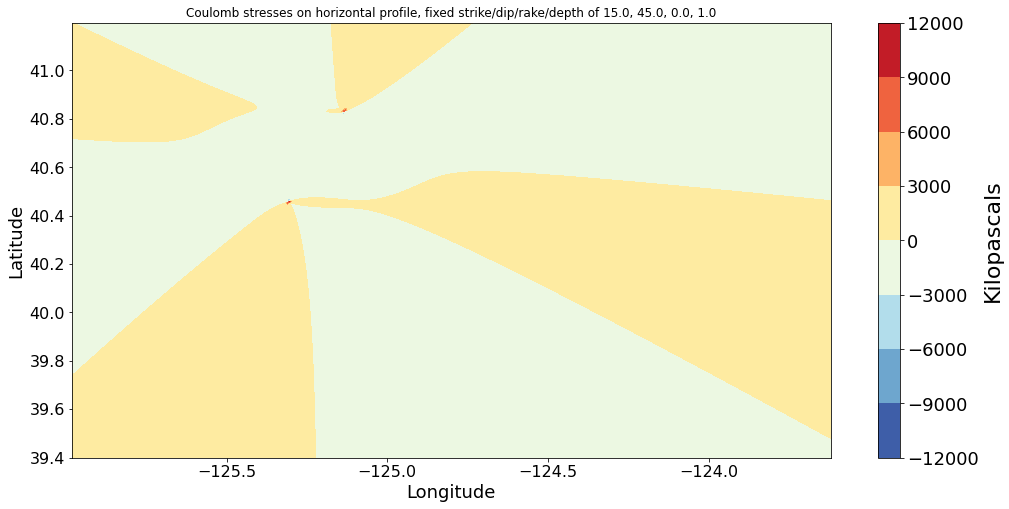

In [48]:
out_object = PyCoulomb.run_dc3d.do_stress_computation(experiment_params, inputs, obs_disp_points, ());
PyCoulomb.output_manager.produce_outputs(experiment_params, inputs, obs_disp_points, (), out_object);

Notice the differences between the plots in the first example and the second example.  The stresses on this profile are much higher at a depth of 1 km because the source is extremely close. You can see singularities at the corners because this calculation depth is very close to the depth of the fault corners. There are also larger displacements in both horizontal and vertical due to the reduced depth of the source. Some of the stresses on the receiver faults change sign due to the change in source depth. 